<a href="https://colab.research.google.com/github/audreychela/Audrey_first_repo/blob/main/project_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Tradegy Project

## Bussiness understanding
* mention the date of the tradegy
* what exactly happened, metnion numbers e.g the number of passagers, those who died and thosee who survived.
* what contributed to high death rate,


### Problem statement
mention the problem, give how the project is going to help alleviate the problem.


### objective/s

1. To identify factors that led to survival
2. To predict the survival using the model.



### Metric of success
1.  the project will be successful if we can identify the factors that contributed to survival of the passengers.
2.  Achieve above 75% accuracy, and have a Recall of above 70%

## Data Undestanding

1. explain the columns in depth

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import re


#import sklearn libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, SMOTEN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve

In [ ]:
#load and read the dataset
data = pd.read_csv("train.csv")
#head
data[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#check the
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Observation: the dataset values are uniform from top to bottom

### dataset relevance
the daset is revelant for example sex feature has male and female values which relate to the accepted standard

In [ ]:
#shape
print(f" The dataset has {data.shape[0]} records and {data.shape[1]} columns")

 The dataset has 891 records and 12 columns


In [ ]:
#data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observation, the dataset comprise of 7 numerical and 5 cat columns

In [ ]:
#concise stat summary

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Obseversion: the average age of the passangers onboard was 29 years, the min age was 4 month old.

In [ ]:
#chec stat summary for categorical columns

In [ ]:
#check unique values

for coln in data:
    uni_vale =data[coln].unique()
    print(f" {coln}\n, {uni_vale}\n")

 PassengerId
, [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243

## Data Preparation

### Data cleaning

In [ ]:
#make a copy
data1 = data.copy(deep=True)

In [ ]:
#drop cabin
del data1["Cabin"]
data1[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [1]:
#convert the column names to lower case
#data1.columns = data1.columns.str.lower()
#data1.columns

NameError: name 'data1' is not defined

In [ ]:
#convert pclass to a str
#data1["pclass"] = data1["pclass"].apply(str)
#data1.info()

In [ ]:
#check the null values
data1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
#impute the age variable with median
age_median = data1["Age"].median()
#impute
data1["Age"] = data1["Age"].fillna(age_median)

#impute embarked with the mode
embarked_mode = data1["Embarked"].mode()[0]

data1["Embarked"] = data1["Embarked"].fillna(embarked_mode)

#confirm the imputation
data1.isna().sum().any()


False

In [ ]:
#check duplicates
data1.duplicated().sum()

0

In [ ]:
print(plt.colormaps(), end=" ")

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

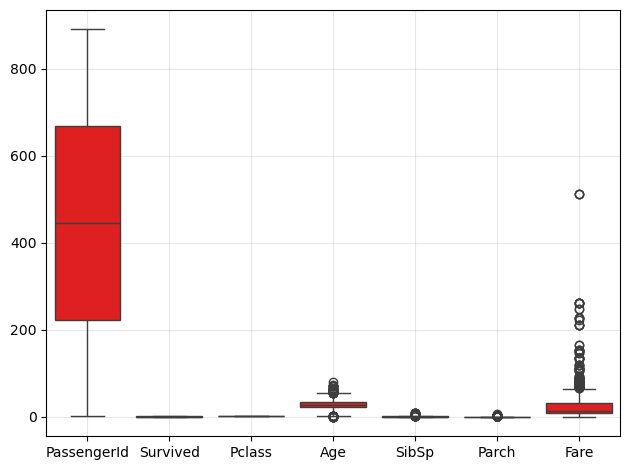

In [ ]:
#check outliers
sns.boxplot(data1,color="r")
plt.tight_layout()
plt.grid(alpha=.3)

observesion: we have outliers but they are genuine so we won't remove them.

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
num_coln = data1[["Age", "Fare"]]
num_coln

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,28.0,23.4500
889,26.0,30.0000


<Axes: xlabel='Age', ylabel='Count'>

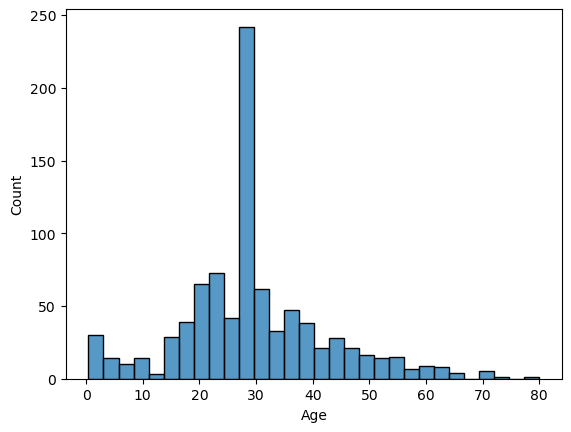

In [ ]:
#visualize all the num columns using histogram
sns.histplot(data1["Age"])

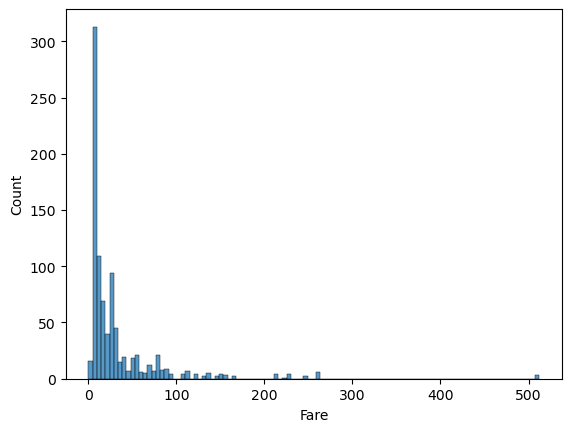

In [ ]:
#visualize fare columns using histogram
sns.histplot(data1["Fare"]);

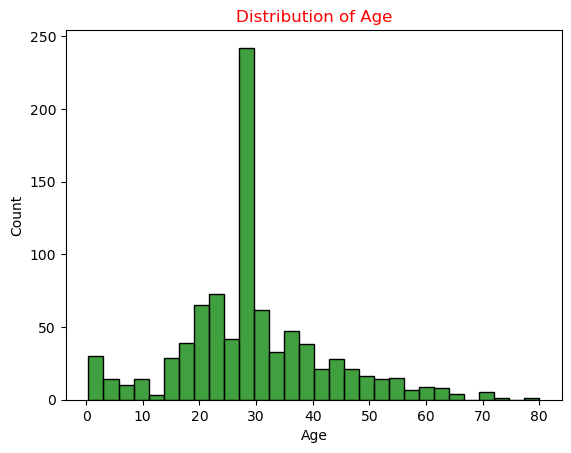

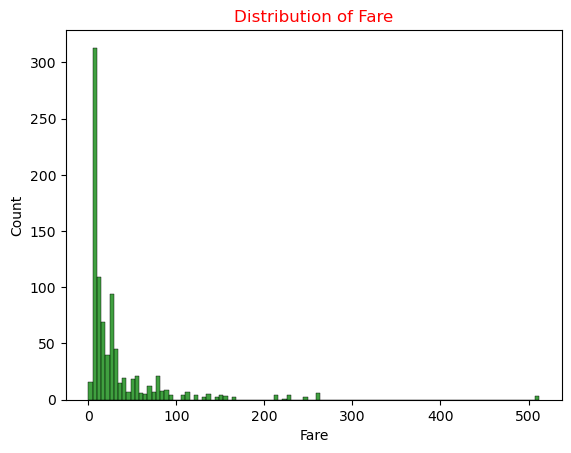

In [ ]:
#another way, visualize all numerical columns
for col in num_coln:
    sns.histplot(data1[col], color="g")
    plt.title(f"Distribution of {col}", color="r")
    plt.show()

''

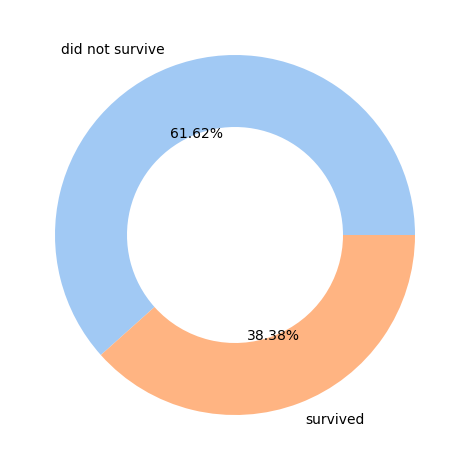

In [ ]:
#check cat
survide_value = data1.Survived.value_counts(ascending=False)

label = ["did not survive", "survived"]

#plot pie chat
color = sns.color_palette("pastel")
plt.pie(survide_value, labels=label, autopct="%.2f%%", wedgeprops=dict(width=.4), colors=color)
plt.tight_layout()
;

observation: we had more death cpmpared to survived, this also shows class imblance

In [ ]:
#do other univariate analysis

In [ ]:
### feature engineering

data1["Age"] = pd.qcut(data1["Age"], 11, duplicates="drop")

data1["Fare"] = pd.qcut(data1["Fare"], 13)

data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,"(19.0, 23.0]",1,0,A/5 21171,"(7.229, 7.75]",S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,"(34.0, 40.0]",1,0,PC 17599,"(55.9, 83.158]",C
2,3,1,3,"Heikkinen, Miss. Laina",female,"(23.0, 27.0]",0,0,STON/O2. 3101282,"(7.896, 8.05]",S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,"(34.0, 40.0]",1,0,113803,"(33.308, 55.9]",S
4,5,0,3,"Allen, Mr. William Henry",male,"(34.0, 40.0]",0,0,373450,"(7.896, 8.05]",S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,"(23.0, 27.0]",0,0,211536,"(10.5, 13.0]",S
887,888,1,1,"Graham, Miss. Margaret Edith",female,"(15.0, 19.0]",0,0,112053,"(26.55, 33.308]",S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,"(27.0, 28.0]",1,2,W./C. 6607,"(15.85, 24.0]",S
889,890,1,1,"Behr, Mr. Karl Howell",male,"(23.0, 27.0]",0,0,111369,"(26.55, 33.308]",C


In [ ]:
# feature engineer name
def exact_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return""
data1["title"] = data1["Name"].apply(exact_title)
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,"(19.0, 23.0]",1,0,A/5 21171,"(7.229, 7.75]",S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,"(34.0, 40.0]",1,0,PC 17599,"(55.9, 83.158]",C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,"(23.0, 27.0]",0,0,STON/O2. 3101282,"(7.896, 8.05]",S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,"(34.0, 40.0]",1,0,113803,"(33.308, 55.9]",S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,"(34.0, 40.0]",0,0,373450,"(7.896, 8.05]",S,Mr


In [ ]:
#feature engineer ticket

data1["ticket_frequency"] = data1.groupby("Ticket")["Ticket"].transform('count')
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,ticket_frequency
0,1,0,3,"Braund, Mr. Owen Harris",male,"(19.0, 23.0]",1,0,A/5 21171,"(7.229, 7.75]",S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,"(34.0, 40.0]",1,0,PC 17599,"(55.9, 83.158]",C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,"(23.0, 27.0]",0,0,STON/O2. 3101282,"(7.896, 8.05]",S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,"(34.0, 40.0]",1,0,113803,"(33.308, 55.9]",S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,"(34.0, 40.0]",0,0,373450,"(7.896, 8.05]",S,Mr,1


In [ ]:
data1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'title', 'ticket_frequency'],
      dtype='object')

In [ ]:
col_drop = data1[["PassengerId","Name", "Ticket" ]]

data1.drop(col_drop, axis=1, inplace=True)
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,ticket_frequency
0,0,3,male,"(19.0, 23.0]",1,0,"(7.229, 7.75]",S,Mr,1
1,1,1,female,"(34.0, 40.0]",1,0,"(55.9, 83.158]",C,Mrs,1
2,1,3,female,"(23.0, 27.0]",0,0,"(7.896, 8.05]",S,Miss,1
3,1,1,female,"(34.0, 40.0]",1,0,"(33.308, 55.9]",S,Mrs,2
4,0,3,male,"(34.0, 40.0]",0,0,"(7.896, 8.05]",S,Mr,1


###  Bivariate analysis

In [ ]:
#set palette color to use
color1 = sns.color_palette("gist_earth")
color2 = sns.color_palette("pastel")

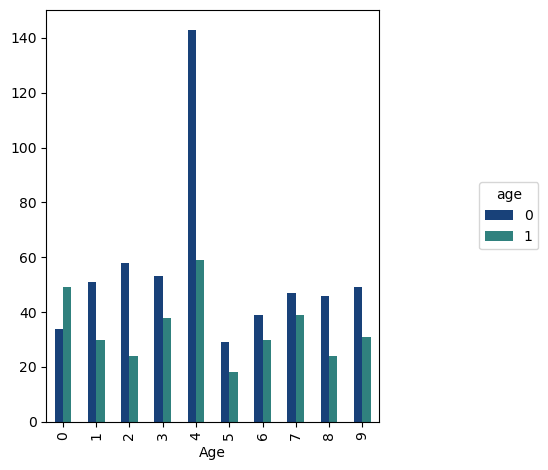

In [ ]:
age_ct = pd.crosstab(data1["Age"], data1["Survived"]).plot(kind="bar", color=color)
plt.legend(title= "age", loc="center right", bbox_to_anchor =[1, 0, 0.5,1])
plt.tight_layout()


In [2]:
_ct = pd.crosstab(data1["Survived"], data1["Pclass"]).plot(kind="bar", color=color2)

NameError: name 'pd' is not defined

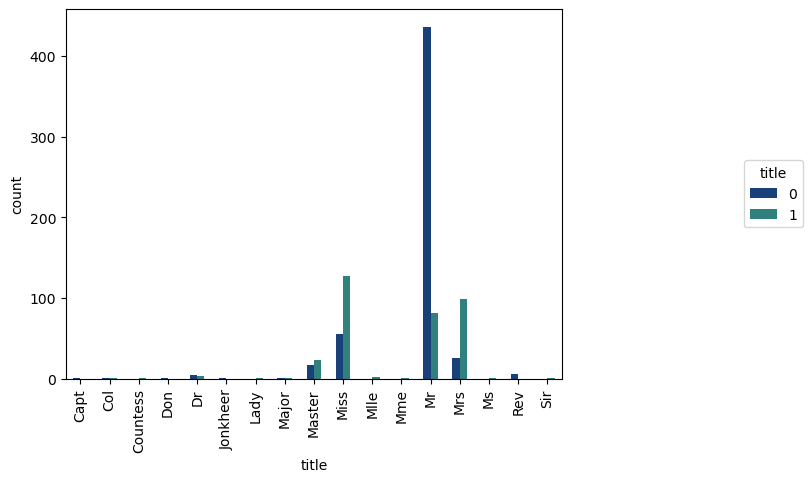

In [ ]:
_ct = pd.crosstab(data1["title"], data1["Survived"]).plot(kind="bar", color=color1)

plt.legend(title= "title", loc="center right", bbox_to_anchor =[1, 0, 0.5,1])
plt.ylabel("count");

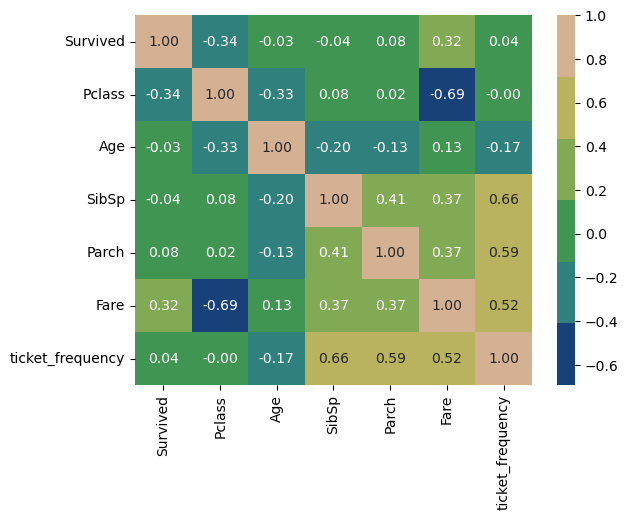

In [ ]:
#do the heatmap

cor = data1.select_dtypes("number").corr()

sns.heatmap(cor, annot=True, fmt=".2f", cmap= color1);

## Modeling

### data Preprocessing

In [ ]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,ticket_frequency
0,0,3,male,"(19.0, 23.0]",1,0,"(7.229, 7.75]",S,Mr,1
1,1,1,female,"(34.0, 40.0]",1,0,"(55.9, 83.158]",C,Mrs,1
2,1,3,female,"(23.0, 27.0]",0,0,"(7.896, 8.05]",S,Miss,1
3,1,1,female,"(34.0, 40.0]",1,0,"(33.308, 55.9]",S,Mrs,2
4,0,3,male,"(34.0, 40.0]",0,0,"(7.896, 8.05]",S,Mr,1


In [ ]:
data1.Age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype   
--------------  -----   
891 non-null    category
dtypes: category(1)
memory usage: 1.4 KB


In [ ]:
#label encode age, fare
le = LabelEncoder()

data1["Age"] = le.fit_transform(data1["Age"])
data1["Fare"] = le.fit_transform(data1["Fare"])
data1


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,ticket_frequency
0,0,3,male,2,1,0,1,S,Mr,1
1,1,1,female,7,1,0,11,C,Mrs,1
2,1,3,female,3,0,0,3,S,Miss,1
3,1,1,female,7,1,0,10,S,Mrs,2
4,0,3,male,7,0,0,3,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,3,0,0,5,S,Rev,1
887,1,1,female,1,0,0,9,S,Miss,1
888,0,3,female,4,1,2,7,S,Miss,2
889,1,1,male,3,0,0,9,C,Mr,1


In [ ]:
coln_2 = data1[["Sex", "title", "Embarked"]]

conl_ohe = pd.get_dummies(coln_2, drop_first=True, dtype="int")


#merge the encoded values with original dataset

merged_df = pd.concat([data1, conl_ohe], axis=1)
#drop the encoded colunms
merged_df.drop(coln_2, axis=1, inplace=True)
merged_df

,Survived,Pclass,Age,SibSp,Parch,Fare,ticket_frequency,Sex_male,title_Col,title_Countess,...,title_Miss,title_Mlle,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir,Embarked_Q,Embarked_S
0,0,3,2,1,0,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,1,7,1,0,11,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,3,3,0,0,3,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,7,1,0,10,2,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,3,7,0,0,3,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,3,0,0,5,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
887,1,1,1,0,0,9,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
888,0,3,4,1,2,7,2,0,0,0,...,1,0,0,0,0,0,0,0,0,1
889,1,1,3,0,0,9,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Seperate labels from features

X = merged_df.drop("Survived", axis=1)
y = merged_df.Survived

In [ ]:
#seperate train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

#check shape
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((712, 25), (179, 25), (712,), (179,))

In [ ]:
# do feature scaling
ss = StandardScaler()
x_train_s =ss.fit_transform(x_train)
x_test_s =ss.transform(x_test)

In [ ]:
# do the models

#Base model(logistic regresion)

lr = LogisticRegression()
lr.fit(x_train_s, y_train)

LogisticRegression()

In [ ]:
print(f" the model score on training dataset is {lr.score(x_train_s, y_train)*100:.2f}%")

 the model score on training dataset is 83.71%


In [ ]:
#check prediction and accuracy

y_pred = lr.predict(x_test_s)

#accuracy
accuracy_score(y_test, y_pred)*100

83.24022346368714

<Axes: >

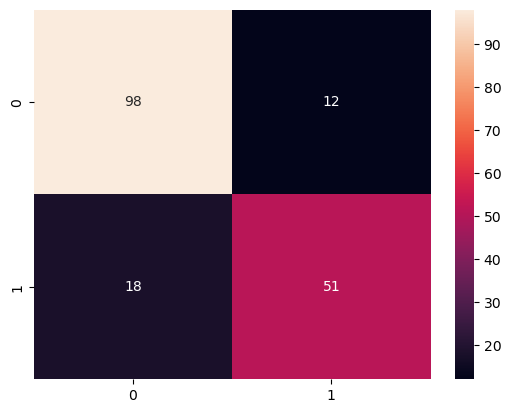

In [ ]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       110
           1       0.81      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



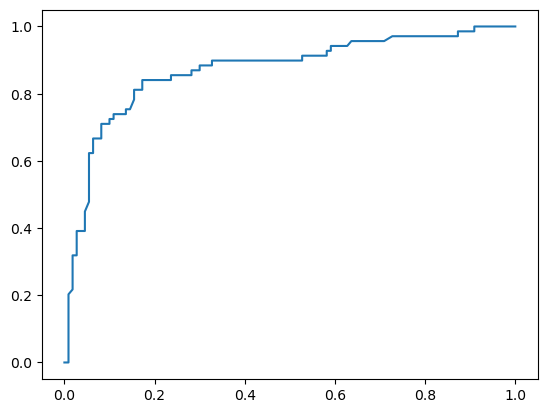

In [ ]:
#createi g AUc
y_pred_proba = lr.predict_proba(x_test_s)[:,1]

fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

#plot
plt.plot(fpr, tpr);

In [ ]:
#create decision tree

tree = DecisionTreeClassifier()
tree.fit(x_train_s, y_train)

#check prediction and accuracy

y_pred = tree.predict(x_test_s)

#accuracy
accuracy_score(y_test, y_pred)*100

75.97765363128491

<Axes: >

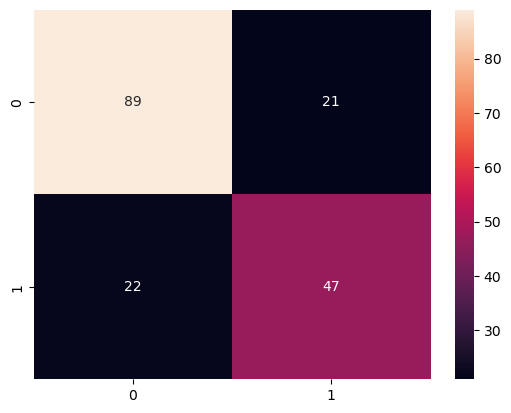

In [ ]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True)

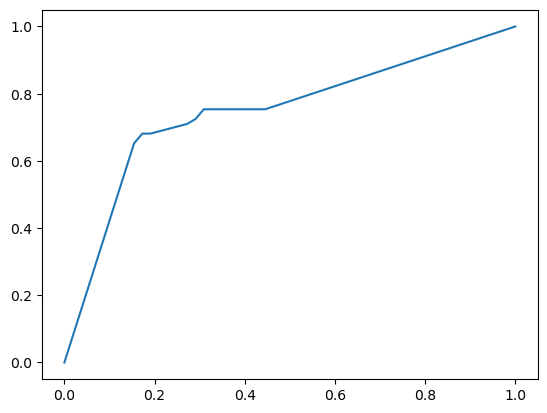

In [ ]:
#createi g AUc
y_pred_proba = tree.predict_proba(x_test_s)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr,tpr);

In [ ]:
##create Random forest

#create decision tree

rf = RandomForestClassifier()
rf.fit(x_train_s, y_train)

#check prediction and accuracy

y_pred = rf.predict(x_test_s)

#accuracy
accuracy_score(y_test, y_pred)*100

75.41899441340783

<Axes: >

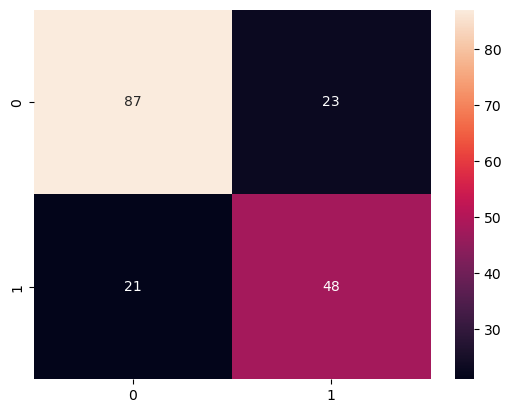

In [ ]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True)

In [ ]:
#xgboots
##create Random forest

#create decision tree

boost= XGBClassifier()
boost.fit(x_train_s, y_train)

#check prediction and accuracy

y_pred = boost.predict(x_test_s)

#accuracy
accuracy_score(y_test, y_pred)*100

79.88826815642457

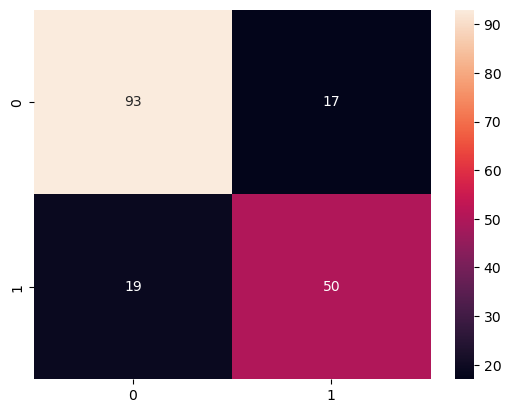

In [ ]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True);

In [ ]:
#check feature importance
#boost.feature_importances_

In [ ]:
#decide on the bset model and then improve it

#fix class imbalance and try training 2 best models



In [ ]:
#Do hyparameter tuning on the best model

In [ ]:
#conclusion, mi=ost of the conclusion should come from EDA

#Recommendation